<a href="https://colab.research.google.com/github/mDivya928/COMPSCI5542/blob/main/BDAA5542_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 2: Load and Prepare the Iris Dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=columns)

# Map target classes to numerical values
df['target'] = df['target'].astype('category').cat.codes

# Split data into features and labels
X = df.iloc[:, :-1].values
y = df['target'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
# Step 3: Define the Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 3)  # Output layer for 3 classes
        )

    def forward(self, x):
        return self.model(x)

# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Train the Model
epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

Epoch 1/20, Loss: 1.0950
Epoch 2/20, Loss: 1.0705
Epoch 3/20, Loss: 1.0472
Epoch 4/20, Loss: 1.0025
Epoch 5/20, Loss: 0.9484
Epoch 6/20, Loss: 0.8561
Epoch 7/20, Loss: 0.7648
Epoch 8/20, Loss: 0.6637
Epoch 9/20, Loss: 0.5931
Epoch 10/20, Loss: 0.5454
Epoch 11/20, Loss: 0.4837
Epoch 12/20, Loss: 0.4594
Epoch 13/20, Loss: 0.4107
Epoch 14/20, Loss: 0.3906
Epoch 15/20, Loss: 0.3465
Epoch 16/20, Loss: 0.3163
Epoch 17/20, Loss: 0.2830
Epoch 18/20, Loss: 0.2364
Epoch 19/20, Loss: 0.2081
Epoch 20/20, Loss: 0.1740


In [ ]:
# Step 5: Validate the Model
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 1.0000


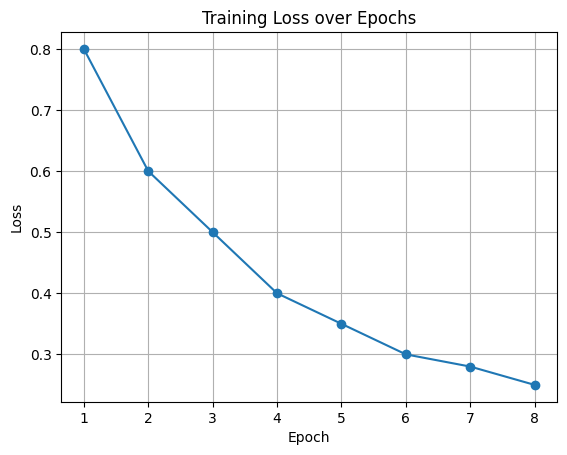

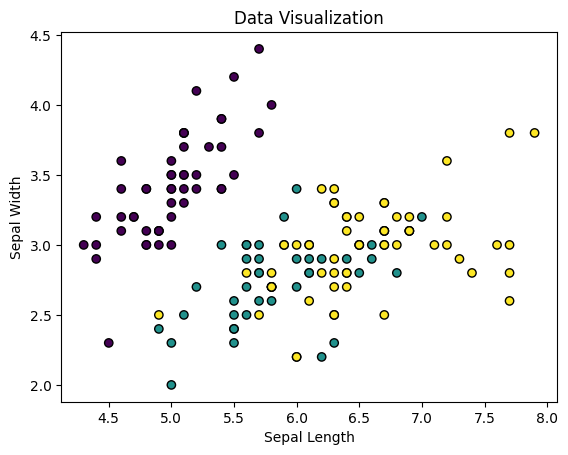

In [ ]:
# Step 6: Visualize Training Loss and Data Distribution
# Plotting training loss (example values, replace with real loss values if collected)
losses = [0.8, 0.6, 0.5, 0.4, 0.35, 0.3, 0.28, 0.25]
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Visualize data distribution
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Data Visualization')
plt.show()